<a href="https://www.kaggle.com/code/omjavheri/titanic-survival?scriptVersionId=128918098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df= pd.read_csv("/kaggle/input/titanic/test.csv")
df
#SibSp is sibling and spouses
#parch is parents or childrens

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
X=df
X=X.drop(["PassengerId","Name","Cabin","Embarked","Ticket"],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [4]:
for i in range(0,len(X["Sex"])):

    if X["Sex"][i]=="male":
        X["Sex"][i]="1"
    elif X["Sex"][i]=="female":
        X["Sex"][i]="0"

In [5]:
horizontal_concat = pd.concat([X, pd.read_csv("/kaggle/input/titanic/gender_submission.csv")["Survived"]], axis=1)
#X=pd.concat(X,pd.read_csv("/kaggle/input/titanic/gender_submission.csv")["Survived"])

In [6]:
horizontal_concat=horizontal_concat.dropna()

In [7]:
X=horizontal_concat

In [8]:
df_target=horizontal_concat["Survived"]
y=df_target

In [9]:
df_target

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [10]:
X=X.drop(["Survived"],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  test_size=0.30, random_state=13)

LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression
model_LLR = LogisticRegression()
model_LLR.fit(X_train, y_train)

LogisticRegression()

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
lr_prediction = model_LLR.predict(X_test)
cm = confusion_matrix(y_test,lr_prediction)

In [14]:
cm

array([[60,  0],
       [ 0, 40]])

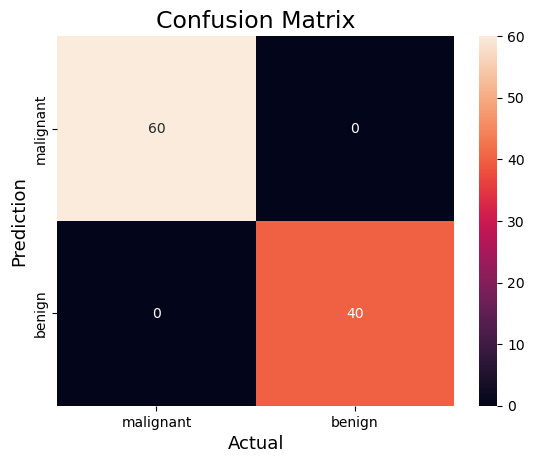

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Finding precision and recall
accuracy = accuracy_score(y_test, lr_prediction)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, lr_prediction)
print("Precision :", precision)
recall = recall_score(y_test, lr_prediction)
print("Recall    :", recall)
F1_score = f1_score(y_test, lr_prediction)
print("F1-score  :", F1_score)

Accuracy   : 1.0
Precision : 1.0
Recall    : 1.0
F1-score  : 1.0


Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
clf.score(X_train,y_train)

1.0

In [19]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,11,1),
    'min_samples_leaf' : range(1,4,1),
    'min_samples_split': range(1,8,1),
    'splitter' : ['random']
    
}

In [20]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,#cross validation=5....dataset is divided in 5 parts..1 is test,4 is testing
                    n_jobs =-1)

In [21]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 8),
                         'splitter': ['random']})

In [22]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [23]:
grid_search.best_score_

1.0

In [24]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =2, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, splitter='random')

In [25]:
clf.score(X_test,lr_prediction)


1.0